<a href="https://colab.research.google.com/github/vajiha110/FMML_IIITH_PROJECTS/blob/main/AIML_Module_4_Lab_3(2)_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent



Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

2.Test all the three out on real datasets.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the Boston Housing Prices dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [10]:

# Create a DataFrame for the features and target variable
boston_df = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
boston_df["PRICE"] = target.astype(float)


In [11]:
# Split the dataset into training and testing sets
X = boston_df[["RM"]].values  # Using only the "RM" feature for simplicity
y = boston_df["PRICE"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


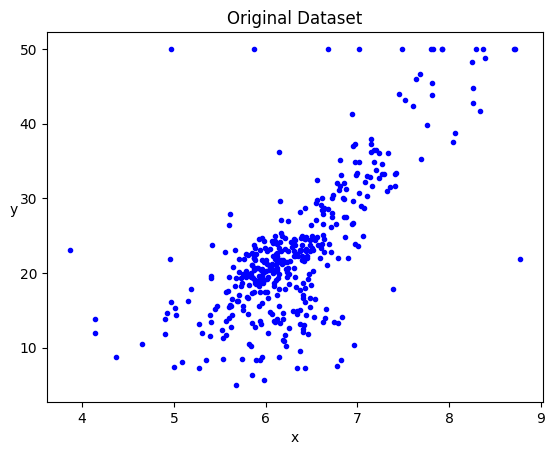

In [12]:

# Plot the original dataset
plt.plot(X_train, y_train, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Original Dataset')
plt.show()


In [13]:
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [14]:

def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it, :] = y_pred.T
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

In [15]:
lr= 0.01
n_iter = 1000

# Initialize y_pred with random values
y_pred = np.random.randn(2, 1)

# Add a column of ones to the feature matrix to represent the bias term
X_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]

# Apply gradient descent
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y_train, y_pred, lr, n_iter)

# Print results and plot the cost history
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: 22.796
y_pred[1]: 6.624
Final error: 21.498


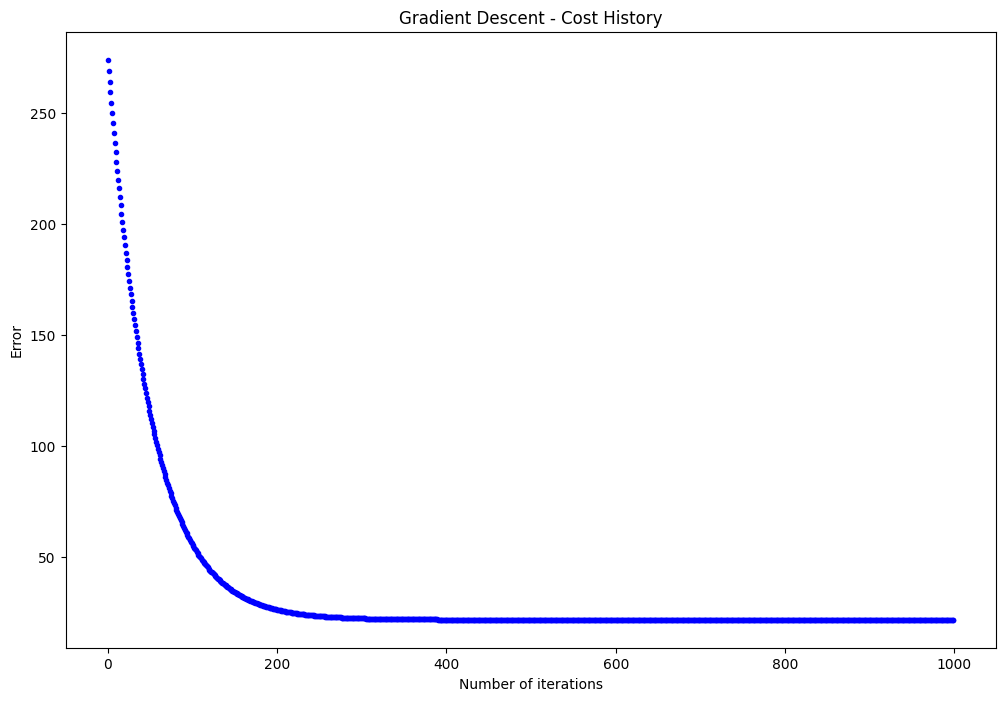

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history, 'b.')
plt.title('Gradient Descent - Cost History')
plt.show()


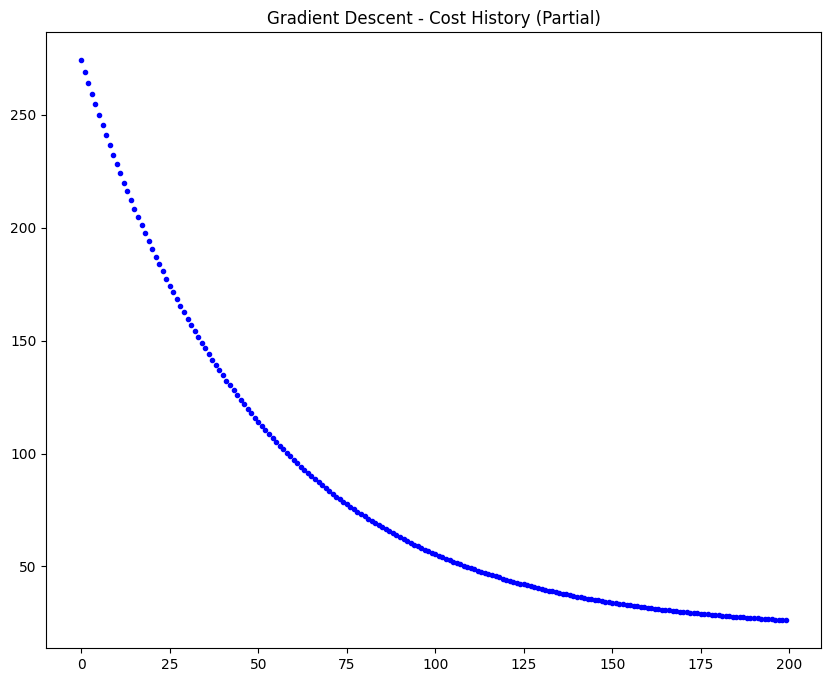

In [17]:

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(range(200), cost_history[:200], 'b.')
plt.title('Gradient Descent - Cost History (Partial)')
plt.show()

#Stocashtic_gradient_descent

In [18]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost/m   #By dividing by "m", you ensure that the reported cost is normalized and represents the average cost per sample.
                                     #This is a common practice when monitoring the training progress to make results more interpretable and comparable across different scenarios.
    return y_pred, cost_history


In [19]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: -8.109
y_pred[1]: 4.758
Final error: 20.524


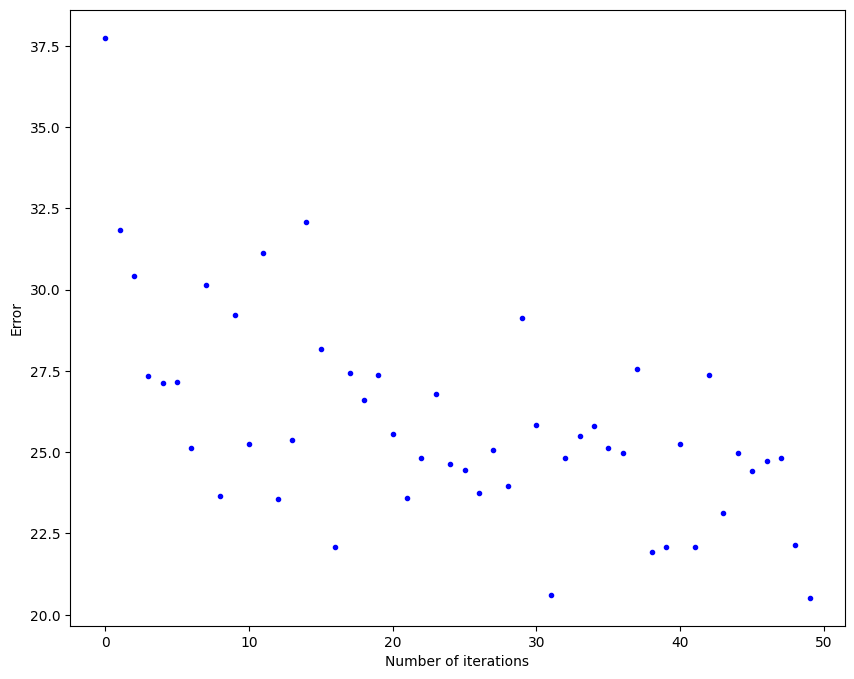

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

#Minibatch_gradient_descent

In [21]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history


In [22]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: -5.712
y_pred[1]: 4.567
Final error: 685.763


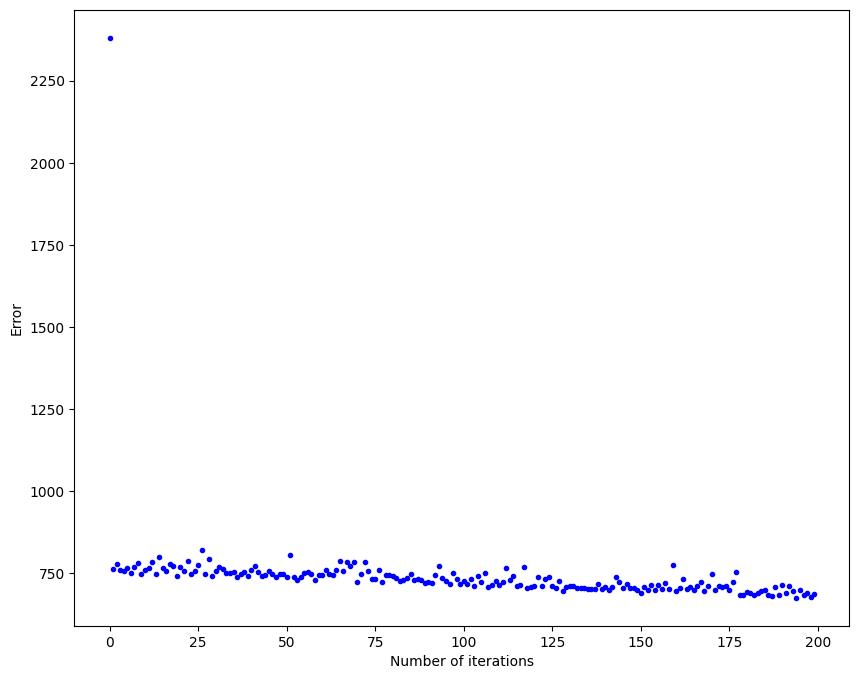

In [23]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

3.Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD

In [24]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

def cal_cost(y_pred, X, y):
    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost
# Batch Gradient Descent
def gradient_descent(X, y, y_pred, learning_rate=0.1, iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history
# Stochastic Gradient Descent
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.1, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history
# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.1, iterations=10, batch_size=20):

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

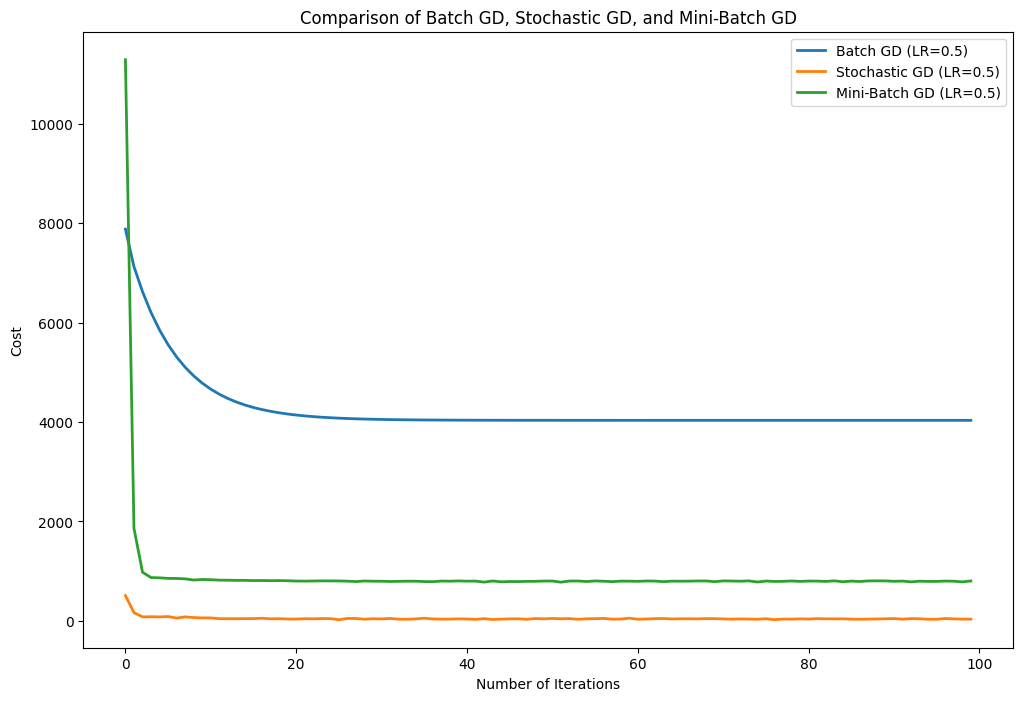

In [25]:
# Set hyperparameters
lr = 0.5
n_iter = 100

# Run Batch Gradient Descent
y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history_batch, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

# Run Stochastic Gradient Descent
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history_stochastic = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

# Run Mini-Batch Gradient Descent
batch_size = 20
y_pred = np.random.randn(2,1)
y_pred, cost_history_minibatch = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

# Plot cost histories
plt.figure(figsize=(12, 8))
plt.plot(range(n_iter), cost_history_batch, label=f'Batch GD (LR={lr})', linewidth=2)
plt.plot(range(n_iter), cost_history_stochastic, label=f'Stochastic GD (LR={lr})', linewidth=2)
plt.plot(range(n_iter), cost_history_minibatch, label=f'Mini-Batch GD (LR={lr})', linewidth=2)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Comparison of Batch GD, Stochastic GD, and Mini-Batch GD')
plt.legend()
plt.show()

Here we are doing with different lr values= 0.01, 0.05, 0.1, 0.5

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for a simple linear regression problem
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to the feature matrix
X_b = np.c_[np.ones((len(X), 1)), X]

# Function to calculate the cost
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))
    return cost

# Function for Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - learning_rate * (1/m) * X.T.dot(errors)
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history

# Function for Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, 2)
            y_i = y[rand_ind].reshape(1, 1)
            prediction = X_i.dot(theta)
            errors = prediction - y_i
            theta = theta - learning_rate * X_i.T.dot(errors)
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history

# Function for Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, learning_rate=0.01, iterations=100, batch_size=20):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i: i + batch_size]
            y_i = y_shuffled[i: i + batch_size]

            prediction = X_i.dot(theta)
            errors = prediction - y_i
            theta = theta - learning_rate * (1/m) * X_i.T.dot(errors)
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history

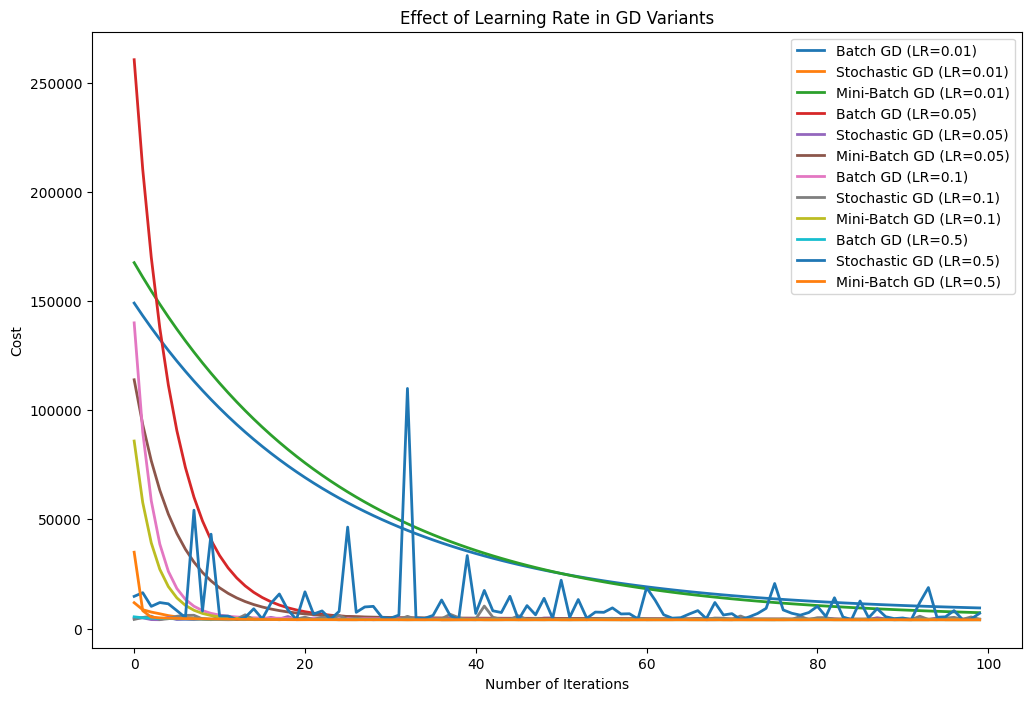

In [27]:
# Set hyperparameters
lr_values = [0.01, 0.05, 0.1, 0.5]  # Different learning rates to compare
n_iter = 100

# Plot cost history for each learning rate
plt.figure(figsize=(12, 8))

for lr in lr_values:
    # Run Batch Gradient Descent
    theta_batch, cost_history_batch = batch_gradient_descent(X_b, y, lr, n_iter)
    plt.plot(range(n_iter), cost_history_batch, label=f'Batch GD (LR={lr})', linewidth=2)

    # Run Stochastic Gradient Descent
    theta_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_b, y, lr, n_iter)
    plt.plot(range(n_iter), cost_history_stochastic, label=f'Stochastic GD (LR={lr})', linewidth=2)

    # Run Mini-Batch Gradient Descent
    theta_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_b, y, lr, n_iter)
    plt.plot(range(n_iter), cost_history_minibatch, label=f'Mini-Batch GD (LR={lr})', linewidth=2)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Effect of Learning Rate in GD Variants')
plt.legend()
plt.show()
